In [1]:
!pip install --quiet --upgrade diffusers transformers accelerate mediapy peft

!pip install --upgrade transformers
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline, TCDScheduler
from huggingface_hub import hf_hub_download

# Choose either 8 or 12 steps:
num_inference_steps = 12

base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "ByteDance/Hyper-SD"
plural = "s" if num_inference_steps > 1 else ""
ckpt_name = f"Hyper-SDXL-{num_inference_steps}step{plural}-CFG-lora.safetensors"
device = "cuda"

# Moved import to after pip install to ensure using the latest version
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16, variant="fp16").to(device)
pipe.load_lora_weights(hf_hub_download(repo_name, ckpt_name))
pipe.fuse_lora()
pipe.scheduler = TCDScheduler.from_config(pipe.scheduler.config)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 14.9 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Hyper-SDXL-12steps-CFG-lora.safetensors:   0%|          | 0.00/787M [00:00<?, ?B/s]

The config attributes {'skip_prk_steps': True} were passed to TCDScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [28]:

prompt = "Create a vibrant and detailed display of traditional Indian sweets on a decorative plate. Include popular sweets like golden jalebis, creamy rasgullas, colorful laddus, soft barfis, and syrupy gulab jamuns. The scene is festive, with bright colors, intricate patterns, and flowers, capturing the rich textures and vibrant hues of the sweets. The background should reflect a traditional Indian setting, with elements like decorative fabrics, brass utensils, and marigold garlands."
seed = random.randint(0, sys.maxsize)

# Pick a value between 5.0 and 8.0:
guidance_scale = 5.0

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['reflect a traditional indian setting, with elements like decorative fabrics, brass utensils, and marigold garlands.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['reflect a traditional indian setting, with elements like decorative fabrics, brass utensils, and marigold garlands.']


  0%|          | 0/12 [00:00<?, ?it/s]

Prompt:	Create a vibrant and detailed display of traditional Indian sweets on a decorative plate. Include popular sweets like golden jalebis, creamy rasgullas, colorful laddus, soft barfis, and syrupy gulab jamuns. The scene is festive, with bright colors, intricate patterns, and flowers, capturing the rich textures and vibrant hues of the sweets. The background should reflect a traditional Indian setting, with elements like decorative fabrics, brass utensils, and marigold garlands.
Seed:	8936602283438470291



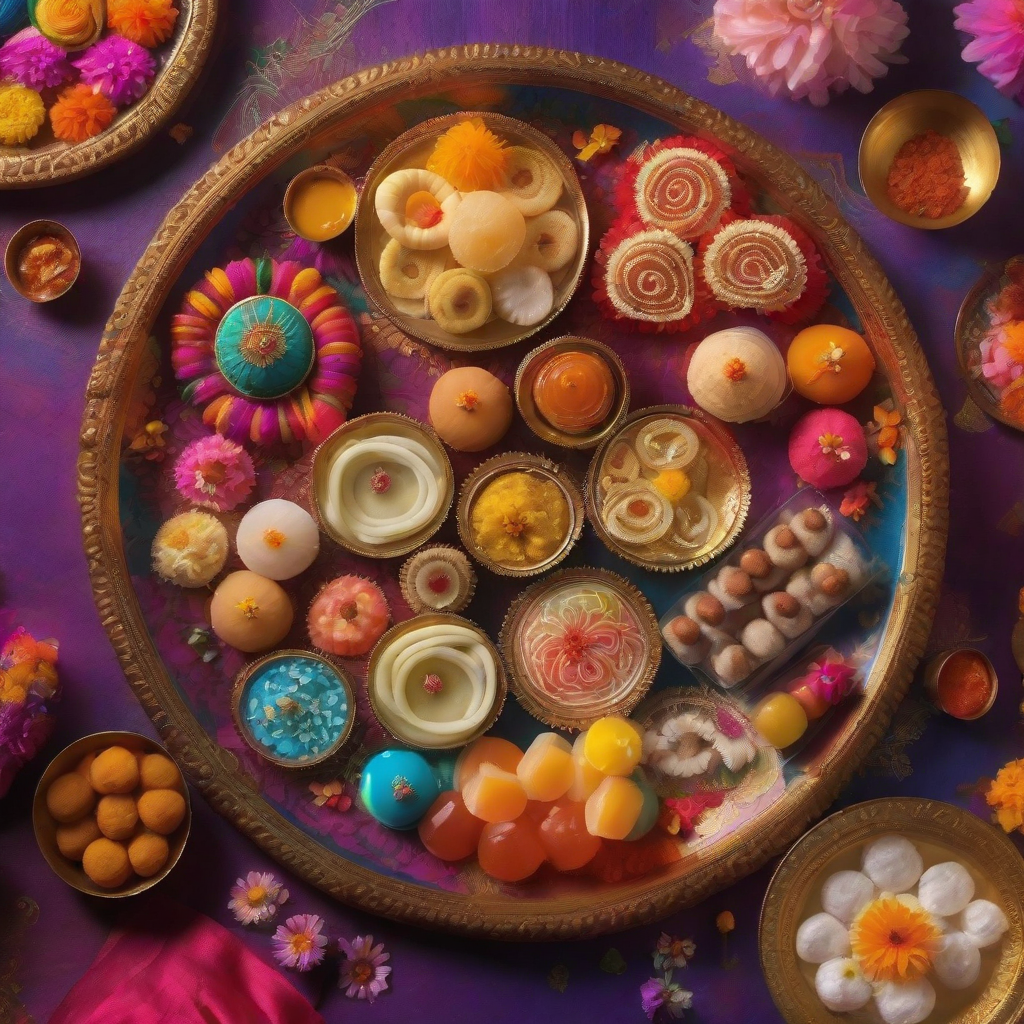

In [29]:
# Decrease eta (min: 0, max: 1.0) to get more details with multi-step inference:
eta = 0.5

images = pipe(
    prompt = prompt,
    num_inference_steps = num_inference_steps,
    guidance_scale = guidance_scale,
    eta = eta,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("Egg-noodles.jpg")

Token indices sequence length is longer than the specified maximum sequence length for this model (137 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['their mouths. the girls savor the sweet, rich taste of the honey as it melts on their tongues, the flavor intensified by the silence and serenity of the cosmos. each girl is surrounded by the soft glow of the stars, creating a scene of cosmic beauty and simple joy in the infinite universe.']
Token indices sequence length is longer than the specified maximum sequence length for this model (137 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['their mouths. the girls savor the sweet, rich taste of the honey as it melts on their tongues, the flavor intensified by the silence an

  0%|          | 0/12 [00:00<?, ?it/s]

Prompt:	Picture a group of girls floating in the vast expanse of space, their surroundings a mesmerizing tapestry of twinkling stars and distant galaxies. They are delicately holding translucent jars of honey, the golden liquid glistening as it catches the light from a nearby nebula. In the weightlessness of space, droplets of honey hover mid-air, shimmering as they slowly drift towards their mouths. The girls savor the sweet, rich taste of the honey as it melts on their tongues, the flavor intensified by the silence and serenity of the cosmos. Each girl is surrounded by the soft glow of the stars, creating a scene of cosmic beauty and simple joy in the infinite universe.
Seed:	1083413749645775981



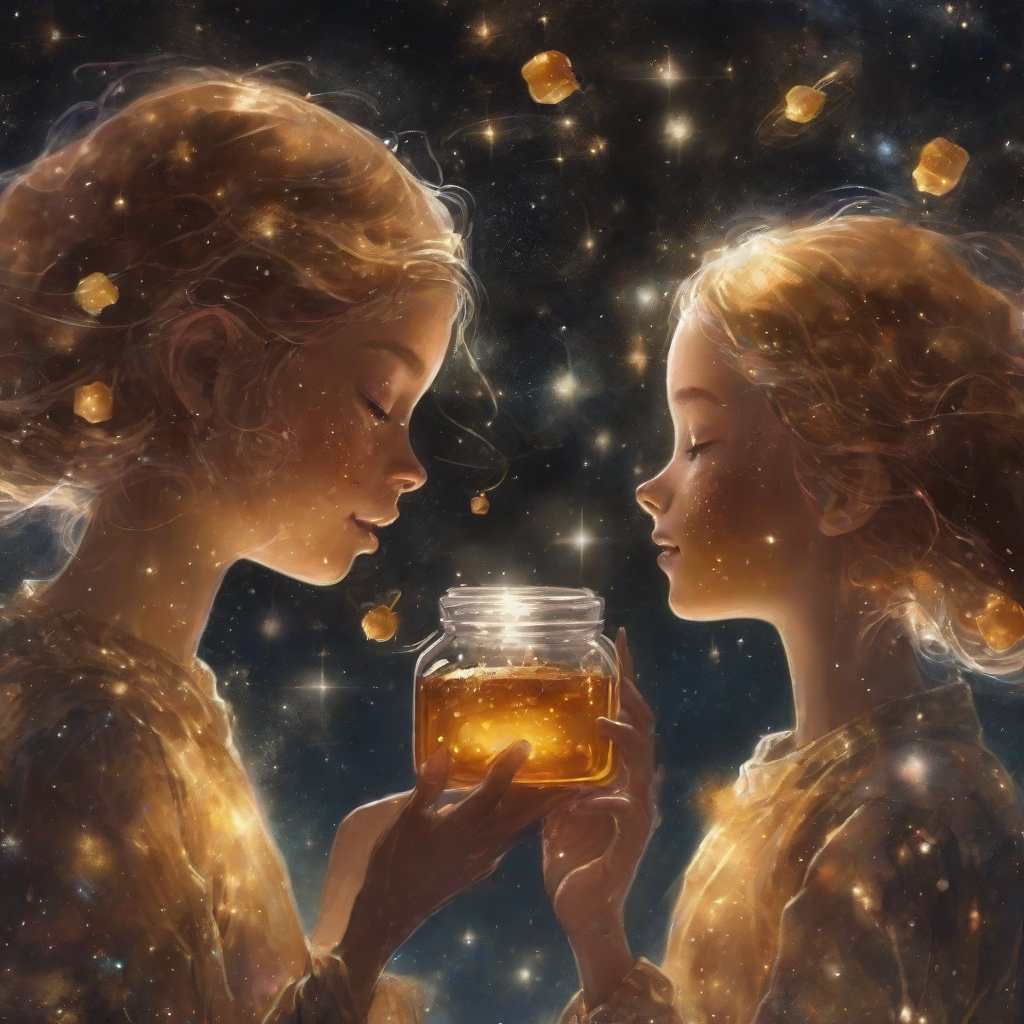

In [4]:

import random
import sys
import torch
import mediapy as media

# Prompt and hyperparameters
prompt = "Picture a group of girls floating in the vast expanse of space, their surroundings a mesmerizing tapestry of twinkling stars and distant galaxies. They are delicately holding translucent jars of honey, the golden liquid glistening as it catches the light from a nearby nebula. In the weightlessness of space, droplets of honey hover mid-air, shimmering as they slowly drift towards their mouths. The girls savor the sweet, rich taste of the honey as it melts on their tongues, the flavor intensified by the silence and serenity of the cosmos. Each girl is surrounded by the soft glow of the stars, creating a scene of cosmic beauty and simple joy in the infinite universe."
seed = random.randint(0, sys.maxsize)
guidance_scale = 5.0
eta = 0.5

# Generate image
images = pipe(
    prompt=prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    eta=eta,
    generator=torch.Generator(device).manual_seed(seed),
).images

# Display and save image
print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("honeygirl.jpg")


  0%|          | 0/12 [00:00<?, ?it/s]

Prompt:	sexy elf lady with sharp ear in short silver hair ,leaves dress, big boobs
Seed:	7570815802687458001



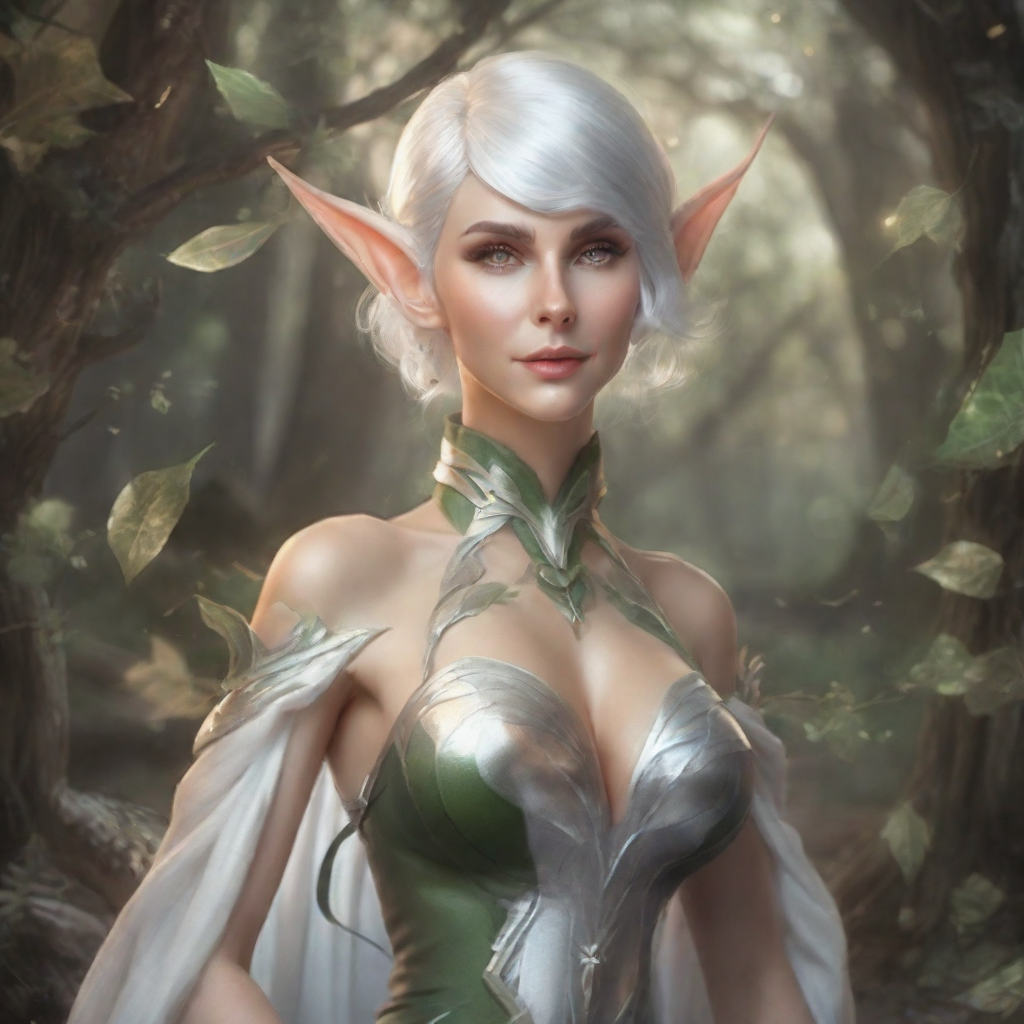

In [8]:

import random
import sys
import torch
import mediapy as media

# Prompt and hyperparameters
prompt = "sexy elf lady with sharp ear in short silver hair ,leaves dress"
seed = random.randint(0, sys.maxsize)
guidance_scale = 5.0
eta = 0.5

# Generate image
images = pipe(
    prompt=prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    eta=eta,
    generator=torch.Generator(device).manual_seed(seed),
).images

# Display and save image
print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("elf.jpg")


Text(value='1girl, humanoid robot, robot, cyborg+, colored_skin,glowing eyes', description='Prompt:', layout=L…

Button(button_style='info', description='Generate Image', layout=Layout(height='50px', width='200px'), style=B…

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	1girl, humanoid robot, robot, cyborg+, colored_skin,glowing eyes
Seed:	2806603791701807738



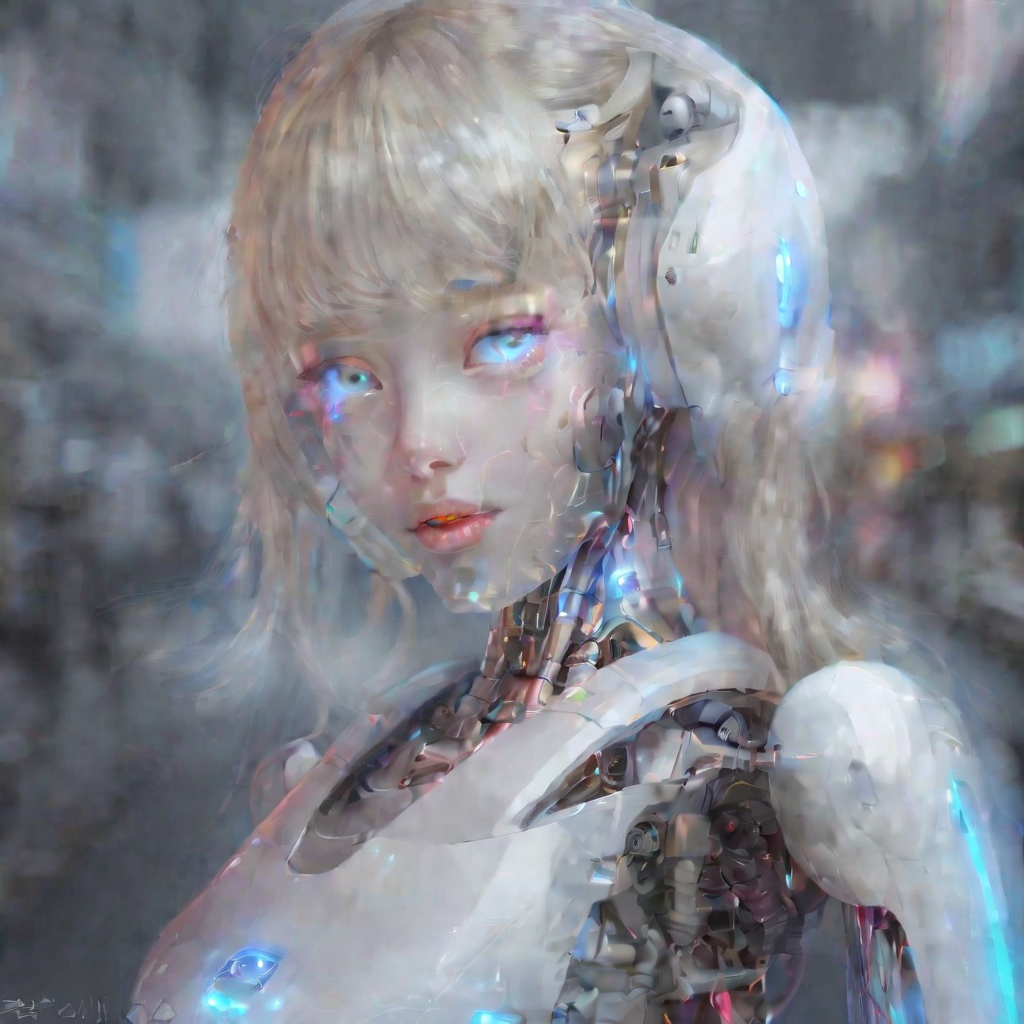

In [27]:

import random
import sys
import torch
import mediapy as media
import ipywidgets as widgets
from IPython.display import display

# Define the image generation function
def generate_image(prompt, guidance_scale=5.0, eta=0.5):
    seed = random.randint(0, sys.maxsize)
    num_inference_steps = 50  # Set a default number of inference steps
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Generate image using the prompt
    images = pipe(
        prompt=prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        eta=eta,
        generator=torch.Generator(device).manual_seed(seed),
    ).images

    # Display and save image
    print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
    media.show_images(images)
    images[0].save("generated_image.jpg")

# Create a text input for the user to enter a prompt
prompt_input = widgets.Text(
    value="1girl, humanoid robot, robot, cyborg+, colored_skin,glowing eyes",
    description='Prompt:',
    layout=widgets.Layout(width='400px')
)

# Create a button to generate the image
generate_button = widgets.Button(
    description="Generate Image",
    button_style='info',  # 'info', 'success', 'warning', 'danger' to change colors
    layout=widgets.Layout(width='200px', height='50px')
)

# Display the text input and button
display(prompt_input, generate_button)

# Define the button click event
def on_button_click(b):
    prompt = prompt_input.value
    generate_image(prompt)

# Link the button click event to the function
generate_button.on_click(on_button_click)


Text(value='', description='Prompt:', layout=Layout(width='400px'))

Button(button_style='info', description='Generate Image', layout=Layout(height='50px', width='200px'), style=B…

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['feels quiet and somber']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['feels quiet and somber']


  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	tachi Uchiha from Naruto writing in a book. He is sitting at a wooden table, viewed from the side, with a dimly lit candle providing soft, warm light. His broken forehead protector lies on the table beside the book. A raven perches nearby, casting a watchful eye over the scene. Itachi's expression is calm and reflective, and the atmosphere feels quiet and somber
Seed:	6802404321785701719



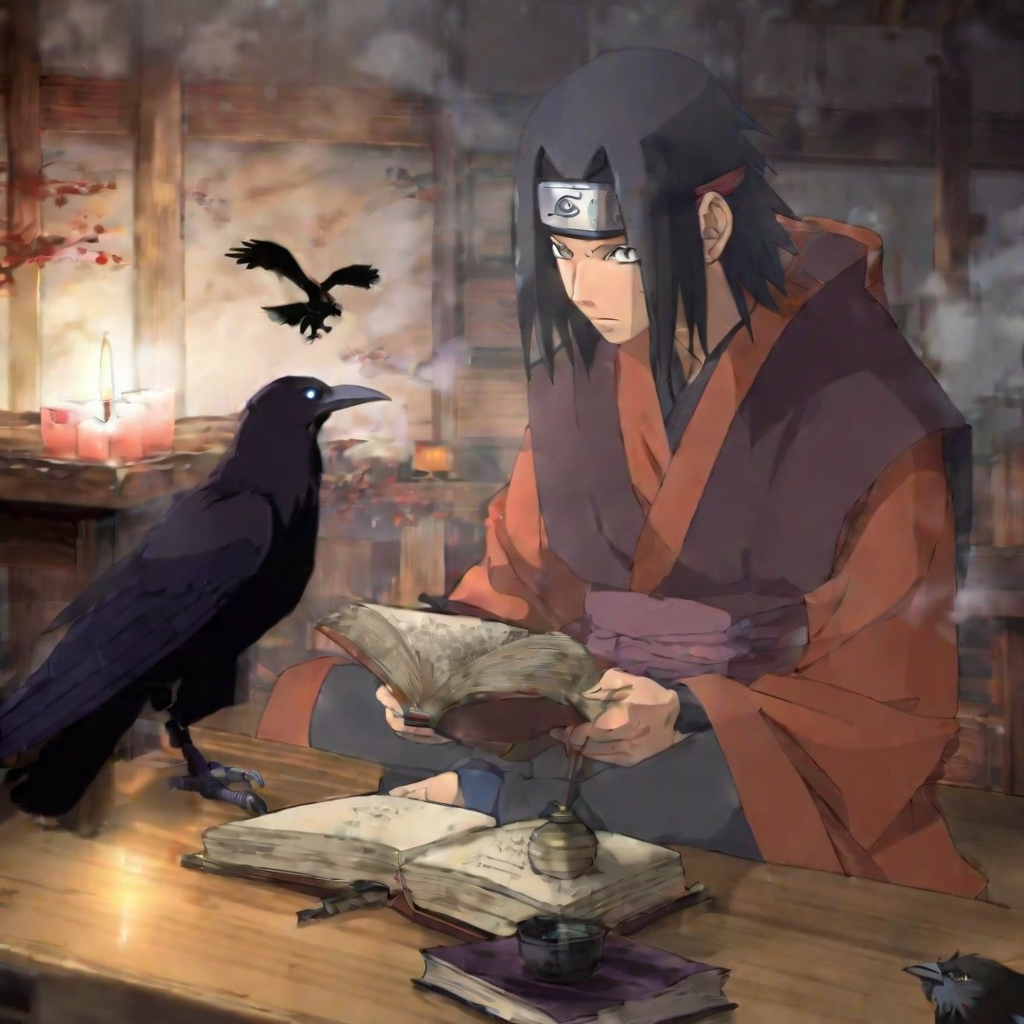

In [25]:
from logging import PlaceHolder
import random
import sys
import torch
import mediapy as media
import ipywidgets as widgets
from IPython.display import display

# Define the image generation function
def generate_image(prompt, guidance_scale=5.0, eta=0.5):
    seed = random.randint(0, sys.maxsize)
    num_inference_steps = 50  # Set a default number of inference steps
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Generate image using the prompt
    images = pipe(
        prompt=prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        eta=eta,
        generator=torch.Generator(device).manual_seed(seed),
    ).images

    # Display and save image
    print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
    media.show_images(images)
    images[0].save("generated_image.jpg")

# Create a text input for the user to enter a prompt
prompt_input = widgets.Text(
    PlaceHolder='Enter your prompt here...',
    description='Prompt:',
    layout=widgets.Layout(width='400px')
)

# Create a button to generate the image
generate_button = widgets.Button(
    description="Generate Image",
    button_style='info',  # Style options: 'info', 'success', 'warning', 'danger'
    layout=widgets.Layout(width='200px', height='50px')
)

# Display the text input and button
display(prompt_input, generate_button)

# Define the button click event
def on_button_click(b):
    prompt = prompt_input.value
    generate_image(prompt)

# Link the button click event to the function
generate_button.on_click(on_button_click)